In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 

from tensorflow import keras
from keras.datasets.mnist import load_data

In [10]:
# load the data
data = load_data()
np.shape(data)

11493376/11490434 [==============================] - 23s 2us/step


/home/jaga/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


(2, 2)

In [11]:
(train_images,train_labels) ,(test_images,test_labels) = data

In [13]:
train_images[0] , train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
           0

In [14]:
# prints only the unique values
set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

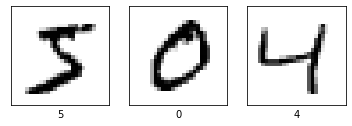

In [23]:
# visualization of sample data

for i in range (3):
    plt.subplot(1,3,i+1)
    plt.xticks([])
    plt.yticks([])              #for displaying in grayscale
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(train_labels[i])
    

In [24]:
# scaling  b/w 0 and 1

train_images = train_images/255.0
test_images = test_images/255.0

In [25]:
np.unique(train_images[0])

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.03529412,
       0.04313725, 0.05490196, 0.0627451 , 0.07058824, 0.09019608,
       0.09411765, 0.09803922, 0.10196078, 0.10588235, 0.11764706,
       0.1372549 , 0.14117647, 0.15294118, 0.16862745, 0.17647059,
       0.18039216, 0.19215686, 0.21568627, 0.21960784, 0.25098039,
       0.25882353, 0.2745098 , 0.30588235, 0.31372549, 0.31764706,
       0.32156863, 0.35294118, 0.36470588, 0.36862745, 0.41960784,
       0.42352941, 0.44705882, 0.46666667, 0.49411765, 0.49803922,
       0.50980392, 0.51764706, 0.52156863, 0.52941176, 0.53333333,
       0.54509804, 0.58039216, 0.58823529, 0.60392157, 0.61176471,
       0.62745098, 0.65098039, 0.66666667, 0.67058824, 0.6745098 ,
       0.68627451, 0.71372549, 0.71764706, 0.72941176, 0.73333333,
       0.74509804, 0.76470588, 0.77647059, 0.78823529, 0.80392157,
       0.81176471, 0.83137255, 0.83529412, 0.85882353, 0.86666667,
       0.88235294, 0.88627451, 0.89803922, 0.93333333, 0.94117

In [41]:
# Model Building 

# 1.create model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='sigmoid'),
    keras.layers.Dense(10,activation='softmax')
])


In [42]:
hidden_layer = model.layers[1]
weights = hidden_layer.get_weights()
print("shape of weights : ", np.shape(weights[0]))
print("shape of biases : ", np.shape(weights[1]))

shape of weights :  (784, 128)
shape of biases :  (128,)


In [43]:
output_layer = model.layers[2]
weights = output_layer.get_weights()
print("shape of weights : ", np.shape(weights[0]))
print("shape of biases : ", np.shape(weights[1]))

shape of weights :  (128, 10)
shape of biases :  (10,)


In [44]:
# compile model

sgd = keras.optimizers.SGD(learning_rate=0.5,decay=1e-6,momentum=0.5)
model.compile(optimizer=sgd,
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])


In [45]:
# training the model

history = model.fit(train_images,train_labels,epochs=10,batch_size=100,validation_split=0.1)

Epoch 1/10
540/540 [==============================] - 6s 10ms/step - loss: 0.6502 - accuracy: 0.8056 - val_loss: 0.2113 - val_accuracy: 0.9377
Epoch 2/10
540/540 [==============================] - 5s 9ms/step - loss: 0.2344 - accuracy: 0.9312 - val_loss: 0.1574 - val_accuracy: 0.9568
Epoch 3/10
540/540 [==============================] - 6s 10ms/step - loss: 0.1681 - accuracy: 0.9506 - val_loss: 0.1244 - val_accuracy: 0.9653
Epoch 4/10
540/540 [==============================] - 6s 10ms/step - loss: 0.1313 - accuracy: 0.9616 - val_loss: 0.1065 - val_accuracy: 0.9705
Epoch 5/10
540/540 [==============================] - 5s 10ms/step - loss: 0.1106 - accuracy: 0.9673 - val_loss: 0.0967 - val_accuracy: 0.9732
Epoch 6/10
540/540 [==============================] - 6s 11ms/step - loss: 0.0932 - accuracy: 0.9720 - val_loss: 0.0927 - val_accuracy: 0.9738
Epoch 7/10
540/540 [==============================] - 6s 11ms/step - loss: 0.0819 - accuracy: 0.9771 - val_loss: 0.0856 - val_accuracy: 0.9758


Text(0, 0.5, 'loss')

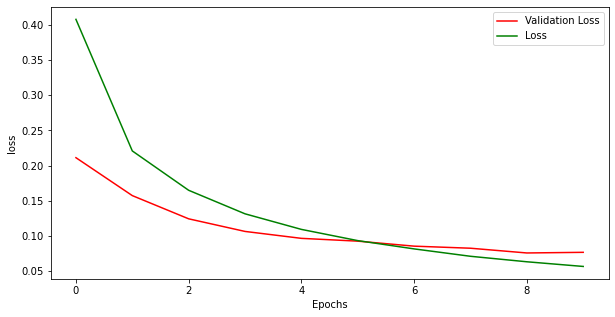

In [46]:
#visualizing the losses 


losses = history.history["loss"]
val_losses = history.history["val_loss"]
indices = range(len(losses))

plt.figure(figsize=(10,5))
plt.plot(indices,val_losses,c='r')
plt.plot(indices,losses,c='g')
plt.legend(['Validation Loss','Loss'])
plt.xlabel("Epochs")
plt.ylabel("loss")

In [47]:
# evaluating 
test_loss, test_acc = model.evaluate(test_images,test_labels)
print("test_acc : ", test_acc)

313/313 [==============================] - 4s 11ms/step - loss: 0.0801 - accuracy: 0.9747
test_acc :  0.9746999740600586


In [48]:
# make predictions
predictions = model.predict(test_images)

In [53]:
# visualizing the prediction with its condidence interval

def plot_confidence(images, labels, predictions):
    plt.figure(figsize=(15,30))
    plt.subplots_adjust(top=0.99 , bottom = 0.01 , hspace=1.5,wspace=0.4)
    plot_index = 0
    for i in range(len(images)):
        plot_index +=1
        plt.subplot(len(images),2,plot_index)
        plt.imshow(images[i], cmap = plt.cm.binary)
        correct_label = str(labels[i])
        predicted_label = str(np.argmax(predictions[i]))
        title=("Correct Label : " + correct_label +'\n'+"Predicted Label : "+predicted_label)
        
        if predicted_label != correct_label :
            plt.title(title, backgroundcolor="r",color='w')
        else :
            plt.title(title, backgroundcolor="g",color='w')
            
        plt.xticks([])
        plt.yticks([])
        
        plot_index +=1
        plt.subplot(len(images),2,plot_index)
        plt.bar(range(10),predictions[i])
        plt.xticks(range(10))
        plt.ylim(0,1)       
        

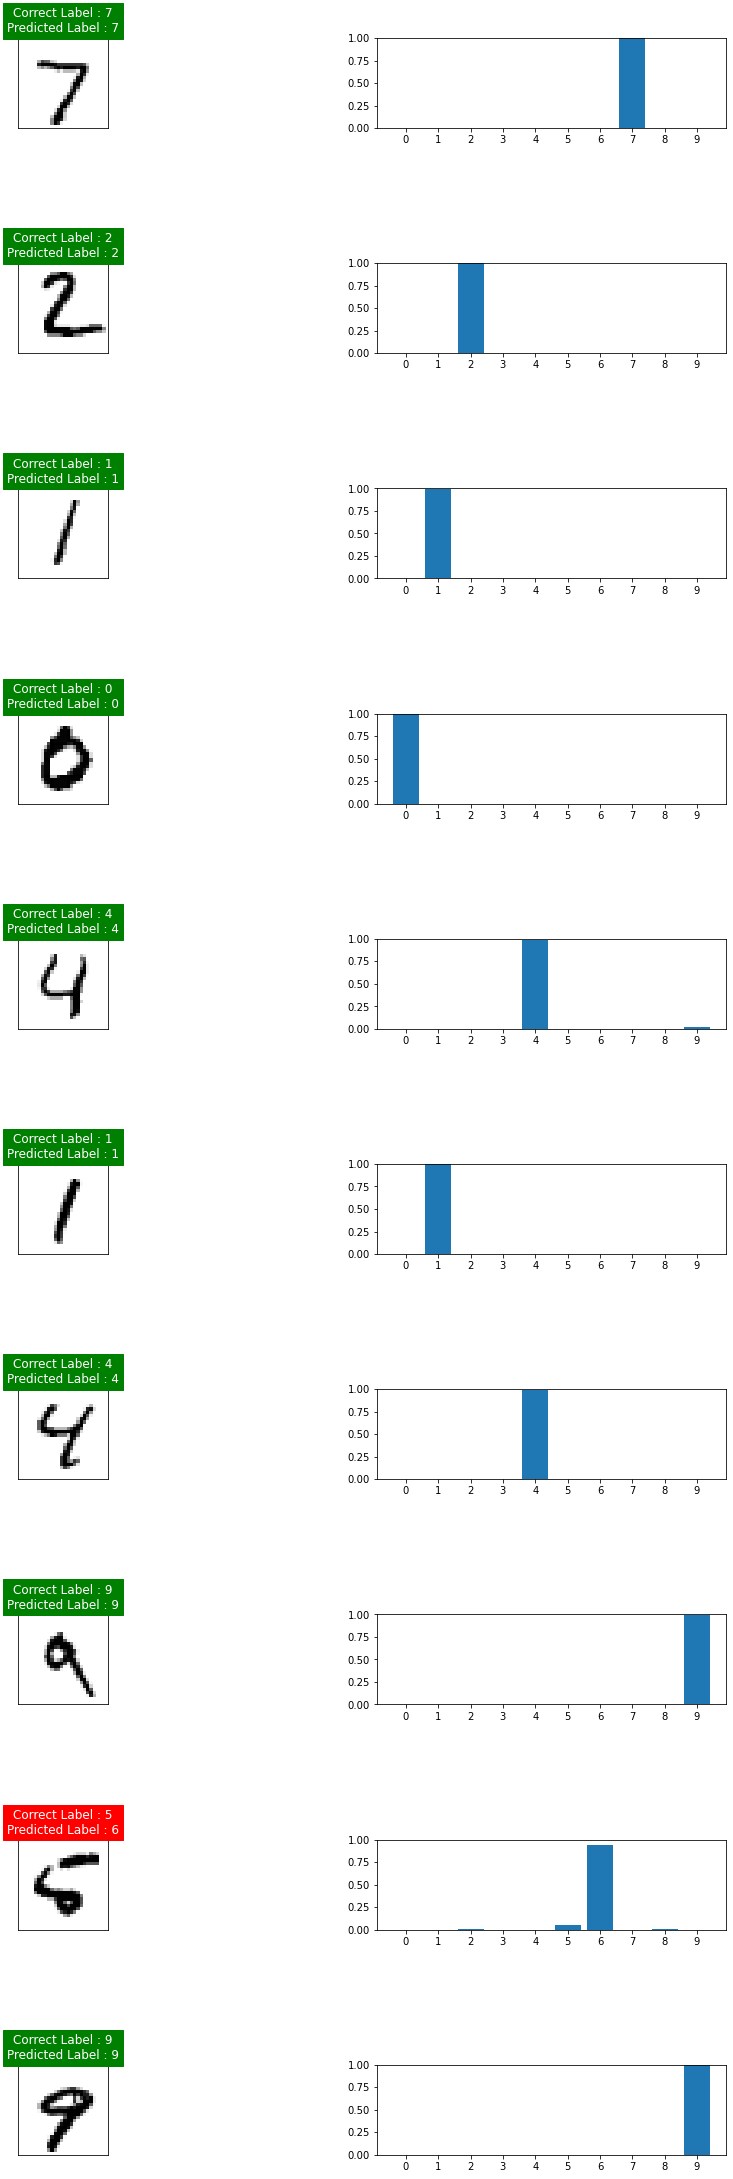

In [54]:
images = test_images[:10]
labels = test_labels[:10]
test_predictions = predictions[:10]

plot_confidence(images,labels,test_predictions)

Number of incorrectly classified images :  253


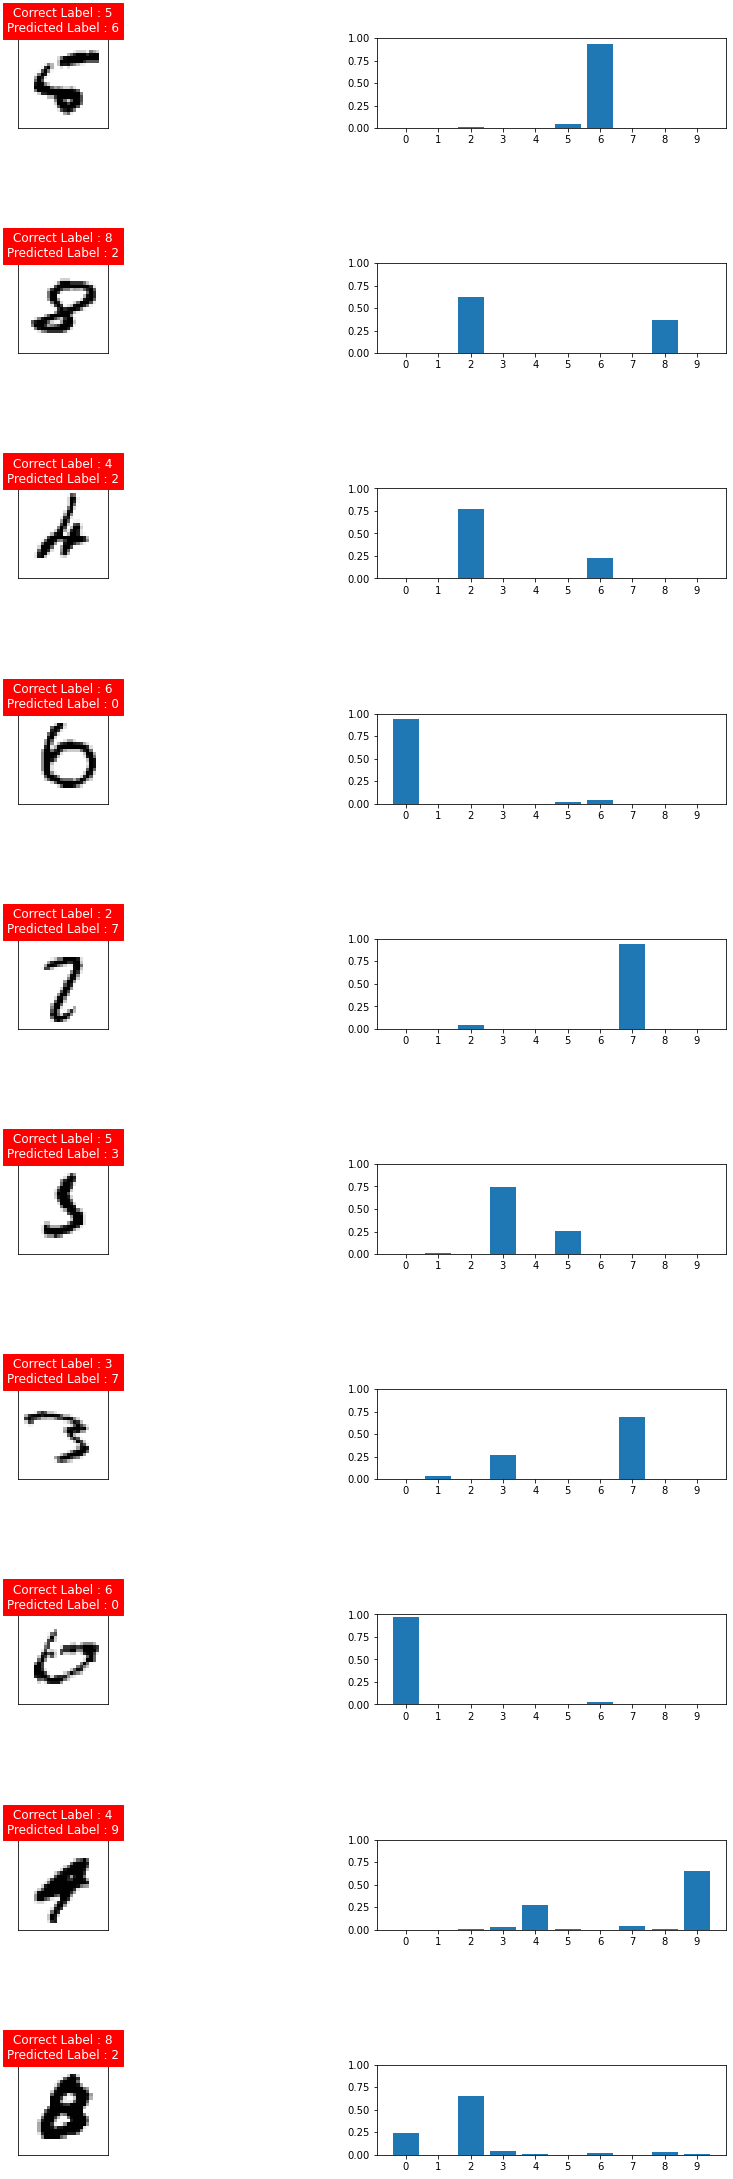

In [55]:
# visualization on incorrectly classified images to understand the prblm behind incorrect
# classification.

incorrect_indices = list()

for i in range(len(predictions)):
    predicted_label = np.argmax(predictions[i])
    if predicted_label != test_labels[i]:
        incorrect_indices.append(i)

print("Number of incorrectly classified images : " , len(incorrect_indices))


incorrect_indices = incorrect_indices[:10]
incorrect_images = [ test_images[i] for i in incorrect_indices]
incorrect_labels = [ test_labels[i] for i in incorrect_indices]
incorrect_predictions = [predictions[i] for i in incorrect_indices]


plot_confidence(incorrect_images,incorrect_labels,incorrect_predictions)